# NN Classification - Exercises

In [41]:
import numpy as np

def plot_decision_boundary(model, train_in, train_out):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """
    X, y = train_in, train_out
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
    
    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Check for multi-class
    if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
      print("doing multiclass classification...")
      # We have to reshape our predictions to get them ready for plotting
      y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
      print("doing binary classifcation...")
      y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

## 1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?

## 2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

In [42]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(
    n_samples, 
    noise=0.01, 
    random_state=42
)

X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

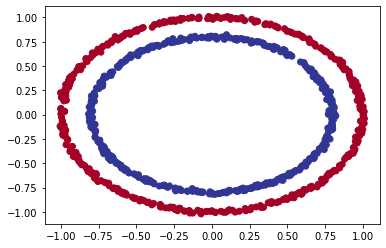

In [43]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu);

In [44]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="softplus"),
  tf.keras.layers.Dense(4, activation="softplus"),
  tf.keras.layers.Dense(4, activation="softplus"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(lr=.02),
                metrics=['accuracy'])

# Create a learning rate scheduler callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# 3. Fit the model
history = model_1.fit(
    X_train, 
    y_train, 
    epochs=100
    # callbacks=[lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.9305 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8746 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8313 - accuracy: 0.4988
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7986 - accuracy: 0.4988
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7733 - accuracy: 0.4988
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7533 - accuracy: 0.4988
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7388 - accuracy: 0.4988
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7275 - accuracy: 0.4988
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7192 - accuracy: 0.4988
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7125 - accuracy: 0.4988
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


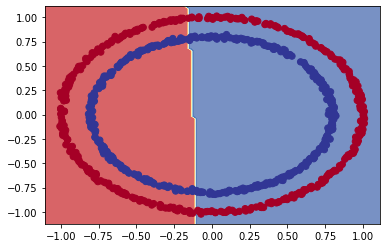

In [45]:
plot_decision_boundary(model_1, X_train, y_train)

Text(0.5, 1.0, 'Model_1 training curves')

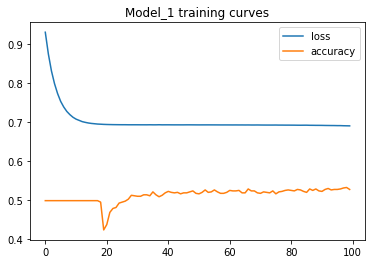

In [46]:
# Plot the loss curves
import pandas as pd

pd.DataFrame(history.history).plot()
plt.title("Model_1 training curves")

In [47]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation="softplus"),  
  tf.keras.layers.Dense(6, activation="softplus"),
  tf.keras.layers.Dense(6, activation="softplus"),
  tf.keras.layers.Dense(6, activation="softplus"),
  tf.keras.layers.Dense(6, activation="softplus"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(lr=.03),
                metrics=['accuracy'])

# Create a learning rate scheduler callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# 3. Fit the model
history2 = model_2.fit(
    X_train, 
    y_train, 
    epochs=1000
    # callbacks=[lr_scheduler]
)

Epoch 1/1000
25/25 [==============================] - 2s 4ms/step - loss: 0.6986 - accuracy: 0.4988
Epoch 2/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.4988
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4913
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5050
Epoch 5/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5013
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4800
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5075
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5013
Epoch 9/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5013
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4913

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


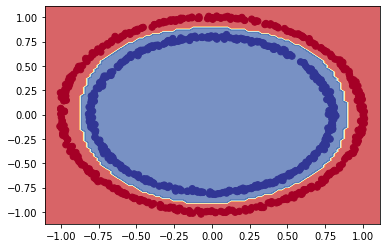

In [48]:
plot_decision_boundary(model_2, X_train, y_train)

Text(0.5, 1.0, 'Model_2 training curves')

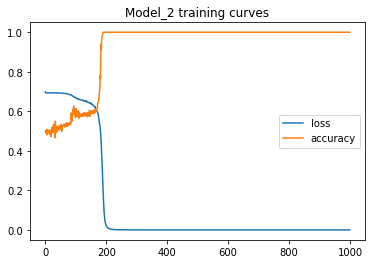

In [50]:
# Plot the loss curves
pd.DataFrame(history2.history).plot()
plt.title("Model_2 training curves")

## 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [51]:
from sklearn.datasets import make_moons

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_moons(
    n_samples, 
    noise=0.1, 
    random_state=42
)

X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

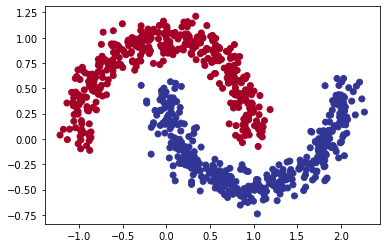

In [52]:
# Visualize with a plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu);

In [61]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation="softplus"),
  tf.keras.layers.Dense(6, activation="softplus"),
  tf.keras.layers.Dense(6, activation="softplus"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(lr=.01),
                metrics=['accuracy'])

# Create a learning rate scheduler callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# 3. Fit the model
history_3 = model_3.fit(
    X_train, 
    y_train, 
    epochs=500
    # callbacks=[lr_scheduler]
)

Epoch 1/500
25/25 [==============================] - 1s 3ms/step - loss: 0.7364 - accuracy: 0.4988
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7154 - accuracy: 0.4988
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.4988
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5025
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.6150
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.6363
Epoch 7/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.7113
Epoch 8/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6400 - accuracy: 0.7713
Epoch 9/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.7887
Epoch 10/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5747 - accuracy: 0.7937
Epoch 11/

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


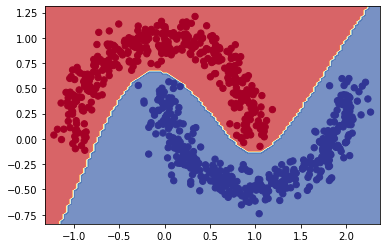

In [62]:
plot_decision_boundary(model_3, X_train, y_train)

Text(0.5, 1.0, 'Model_3 training curves')

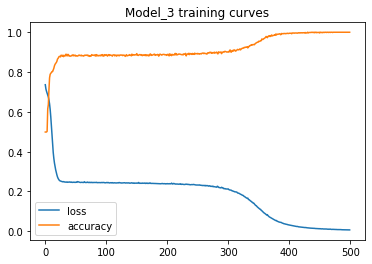

In [63]:
# Plot the loss curves
pd.DataFrame(history_3.history).plot()
plt.title("Model_3 training curves")

## 4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

In [70]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

In [71]:
def plot_random_images(model, images, true_labels, classes):
    plt.figure(figsize=(20,20))

    for k in range(25):

        # Setup random integer
        i = random.randint(0, len(images))
        
        # Create predictions and targets
        target_image = images[i]
        pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[i]]

        # Plot the target image
        plt.imshow(target_image, cmap=plt.cm.binary)

        # Change the color of the titles depending on if the prediction is right or wrong
        if pred_label == true_label:
          color = "green"
        else:
          color = "red"

        plt.subplot(5,5,k+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(target_image, cmap=plt.cm.binary)


        # Add xlabel information (prediction/true label)
        plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                        100*tf.reduce_max(pred_probs),
                                                        true_label),
                  color=color) # set the color to green or red

    plt.show()





In [72]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [73]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [74]:
train_images = train_images / 255.0

test_images = test_images / 255.0

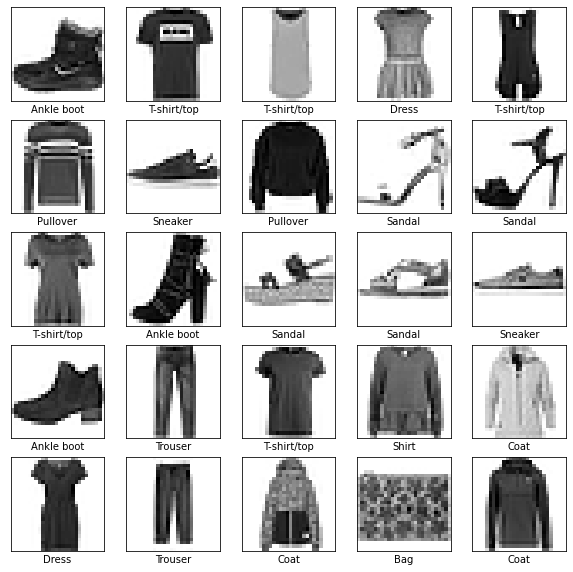

In [76]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [77]:
inputs = tf.random.normal(shape=(32, 10))
outputs = tf.keras.activations.softmax(inputs)
tf.reduce_sum(outputs[0, :])  # Each sample in the batch now sums to 1

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

## 6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [78]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [85]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(6, activation="softplus"),
  tf.keras.layers.Dense(6, activation="softplus"),
  tf.keras.layers.Dense(6, activation="softplus"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_4 = model_4.fit(
    train_images,
    train_labels,
    epochs=40,
    validation_data=(test_images, test_labels),
    callbacks=[lr_scheduler]    
) # see how the model performs on the test set during training

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9711 - accuracy: 0.6600 - val_loss: 0.6049 - val_accuracy: 0.7845 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5516 - accuracy: 0.8041 - val_loss: 0.5523 - val_accuracy: 0.8046 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5028 - accuracy: 0.8249 - val_loss: 0.5178 - val_accuracy: 0.8188 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4829 - accuracy: 0.8306 - val_loss: 0.5066 - val_accuracy: 0.8210 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4727 - accuracy: 0.8331 - val_loss: 0.5229 - val_accuracy: 0.8086 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4653 - accuracy: 0.8361 - val_loss: 0.5257 - val_accuracy: 0.8104 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

In [86]:
model_4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_59 (Dense)            (None, 6)                 4710      
                                                                 
 dense_60 (Dense)            (None, 6)                 42        
                                                                 
 dense_61 (Dense)            (None, 6)                 42        
                                                                 
 dense_62 (Dense)            (None, 10)                70        
                                                                 
Total params: 4,864
Trainable params: 4,864
Non-trainable params: 0
_________________________________________________________________


In [87]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

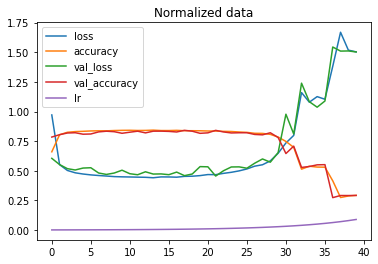

In [88]:

pd.DataFrame(history_4.history).plot(title="Normalized data");

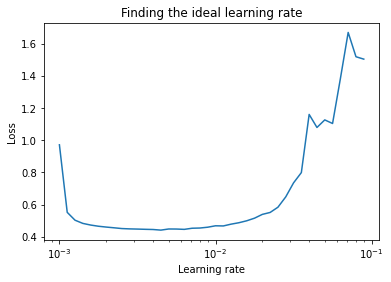

In [89]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, history_4.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [92]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(10, activation="softplus"),
  tf.keras.layers.Dense(10, activation="softplus"),
  tf.keras.layers.Dense(10, activation="softplus"),
  tf.keras.layers.Dense(10, activation="softplus"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.002), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_images,
                       train_labels,
                       epochs=50,
                       validation_data=(test_images, test_labels))

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7832 - accuracy: 0.7209 - val_loss: 0.5931 - val_accuracy: 0.7901
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5351 - accuracy: 0.8137 - val_loss: 0.5385 - val_accuracy: 0.8172
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4905 - accuracy: 0.8292 - val_loss: 0.5145 - val_accuracy: 0.8145
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4517 - accuracy: 0.8421 - val_loss: 0.4751 - val_accuracy: 0.8338
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4244 - accuracy: 0.8501 - val_loss: 0.4765 - val_accuracy: 0.8349
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4055 - accuracy: 0.8562 - val_loss: 0.4913 - val_accuracy: 0.8205
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3964 - accuracy: 0.8594 - val_loss: 0.4453 - val_accuracy:

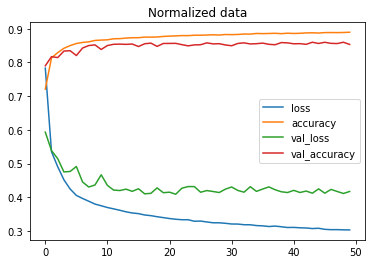

In [93]:
pd.DataFrame(history_5.history).plot(title="Normalized data");

1/1 [==============================] - 0s 77ms/step


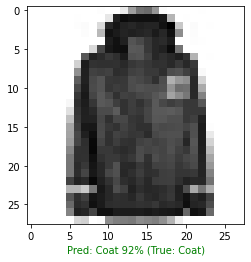

In [94]:
plot_random_image(model_5, test_images, test_labels, classes=class_names)

1/1 [==============================] - 0s 26ms/step


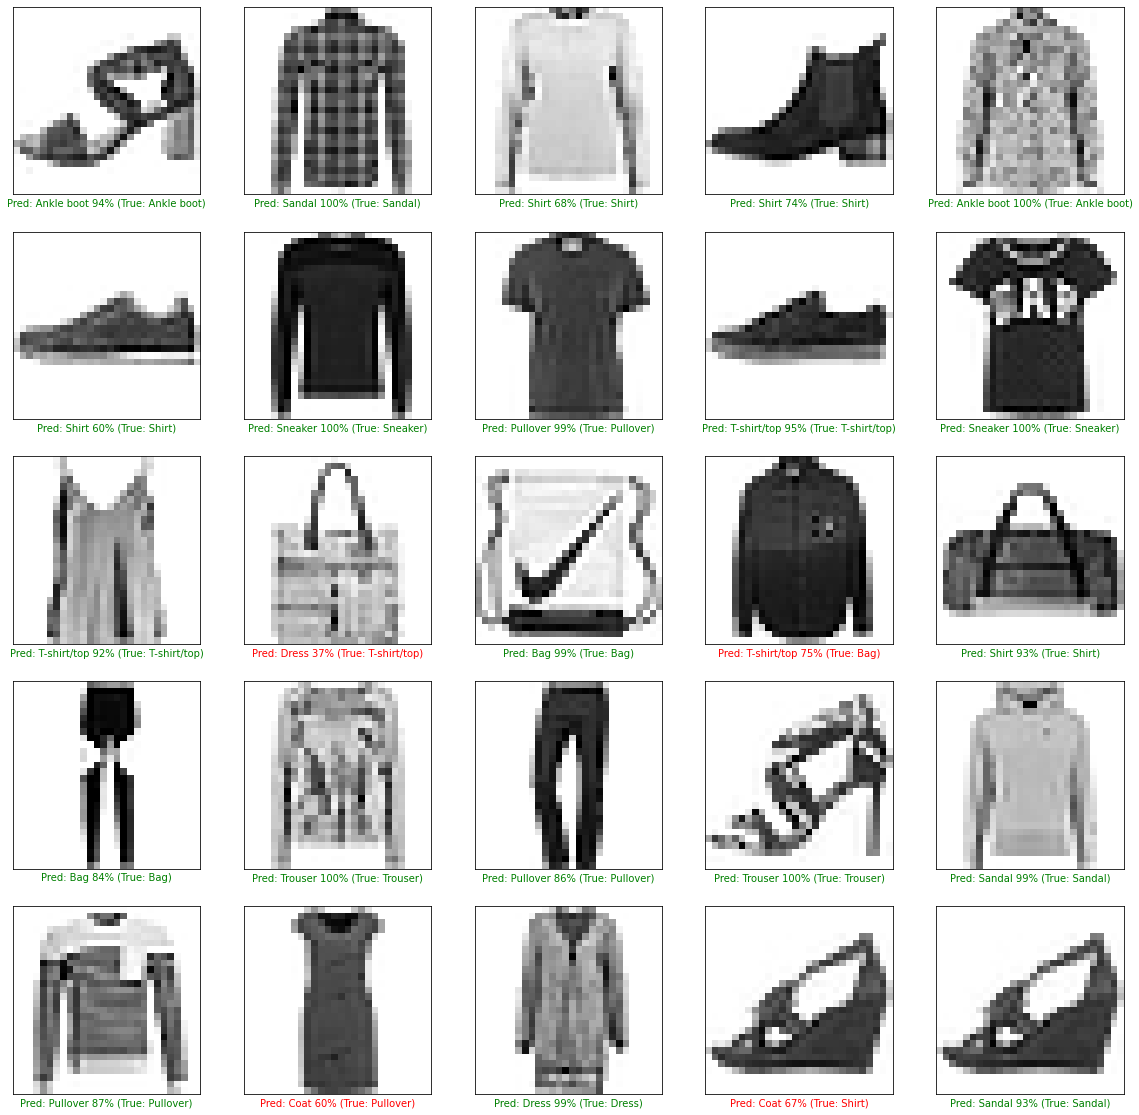

In [95]:
plot_random_images(model_5, test_images, test_labels, classes=class_names)

In [96]:
y_preds_5 = model_5.predict(test_images).argmax(axis=1)

y_preds_5

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

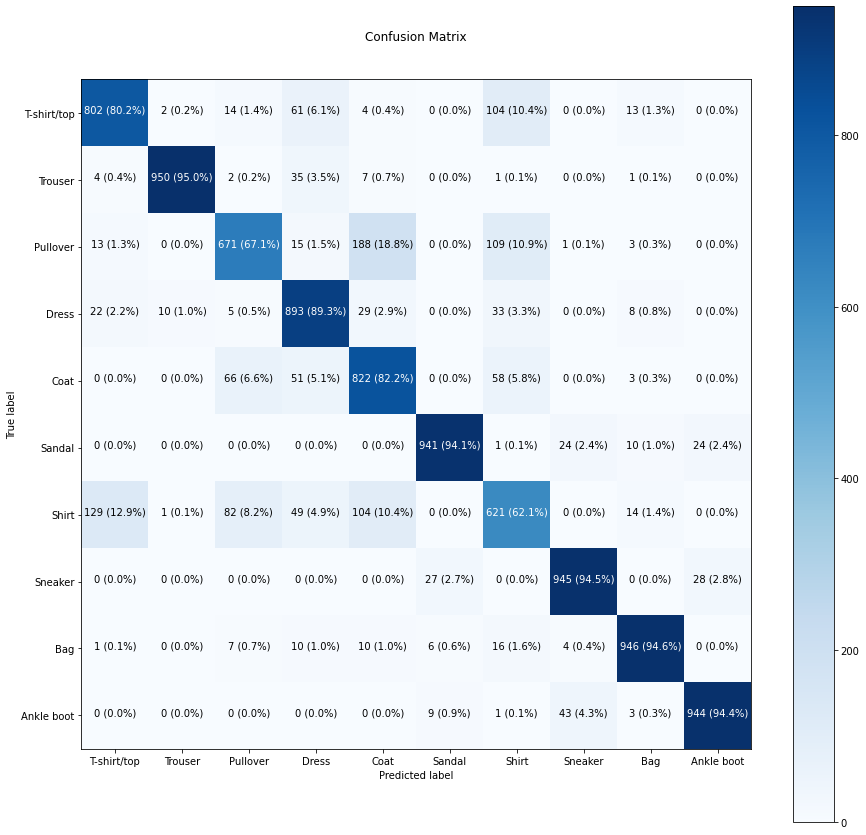

In [97]:
# Make a prettier confusion matrix
make_confusion_matrix(
    y_true=test_labels, 
    y_pred=y_preds_5,
    classes=class_names,
    figsize=(15, 15),
    text_size=10
)

## 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [98]:
train_images.shape

(60000, 28, 28)

In [99]:
train_labels.shape

(60000,)

In [100]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [101]:
class_names.index('Bag')

8

In [102]:
np.random.choice(np.squeeze(np.argwhere(test_labels==8)), size=4, replace=False)

array([7935, 2378, 3183, 2576])

In [103]:
def plot_from_class(model, images, true_labels, class_, classes=class_names):
    plt.figure(figsize=(10,10))

    for k, i in enumerate(np.random.choice(np.squeeze(np.argwhere(test_labels==classes.index(class_))), size=4, replace=False)):

        # Setup random integer
        
        # Create predictions and targets
        target_image = images[i]
        pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[i]]

        # Plot the target image
        plt.imshow(target_image, cmap=plt.cm.binary)

        # Change the color of the titles depending on if the prediction is right or wrong
        if pred_label == true_label:
          color = "green"
        else:
          color = "red"

        plt.subplot(2,2,k+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(target_image, cmap=plt.cm.binary)
        plt.title(f'{class_} Predictions')

        # Add xlabel information (prediction/true label)
        plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                        100*tf.reduce_max(pred_probs),
                                                        true_label),
                  color=color) # set the color to green or red

    plt.show()


1/1 [==============================] - 0s 30ms/step


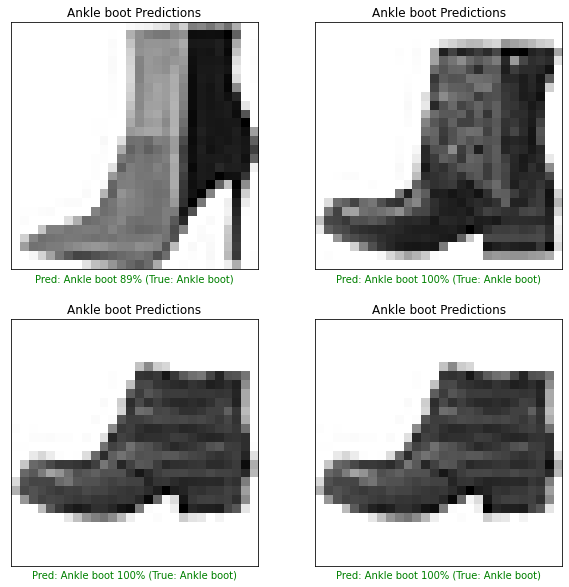

In [106]:
plot_from_class(model_5, test_images, test_labels, class_='Ankle boot')